### TP1 Différences finies ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### 1 Construction et visualisation du maillage et de la condition initiale ###

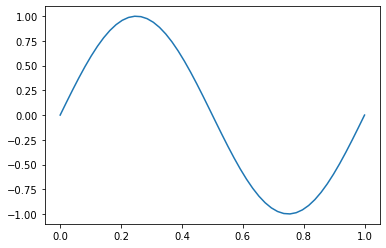

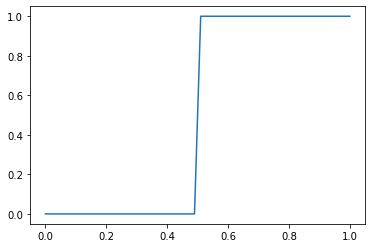

In [2]:
L=1
m=50
x0=0.5

x=np.linspace(0,L,m)

# Conditions initiales
#CL1
def cond_init_cl1(x,L,beta=1):
    return np.sin(math.pi*beta*2*x/L)

#CL2
def cond_init_cl2(x,x0):
    m=len(x)
    u0_2=np.zeros(m)
    for i in range(m):
        if x[i]<x0:
            u0_2[i]=0
        else:
            u0_2[i]=1
    return u0_2

plt.plot(x,cond_init_cl1(x,L))
plt.show()

plt.plot(x,cond_init_cl2(x,x0))
plt.show()

### 2 Etude du comportement de schemas differences finies

**Schéma FOU-EE :**
$u_i^{n+1}=u_i^{n}-C(u_i^{n}-u_{i-1}^{n})$

In [3]:
def FOU_EE(u0, x, n, C):
    T = L/a # Temps de période de la fonction
    dt = dx*C/a # Pas de la discrétisation en temps
    un = np.copy(u0) 
    u =np.zeros(len(u0))
    for j in range(n):
        u[0] = un[0]-C*(un[0]-un[-1])
        for i in range(1,len(x)):
            u[i] = un[i]-C*(un[i]-un[i-1])
        un = np.copy(u)
    return un

In [4]:
L=1
m=50
x0=0.5

x=np.linspace(0,L,m)
a = 1 # Vitesse de convection
T = L/a # Temps de période de la fonction
C = 0.5 # Nombre de Couran
dx = L/(m-1) # Pas de la discrétisation en espace
dt = dx*C/a # Pas de la discrétisation en temps

- Visualiser les solutions obtenues en partant de la condition initiale CI1, en utilisant successivement des valeurs de β  egales a 2, 4, 8 et 16 et noter vos observations.

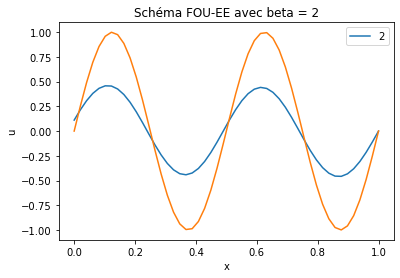

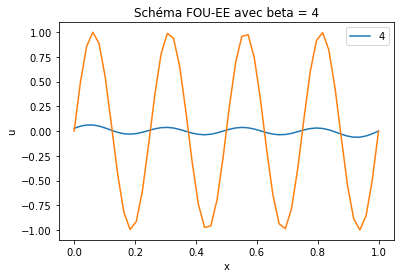

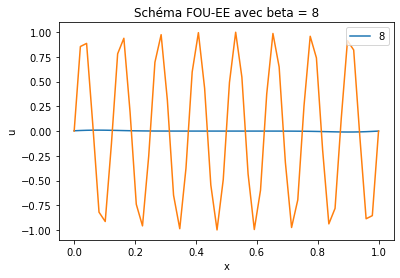

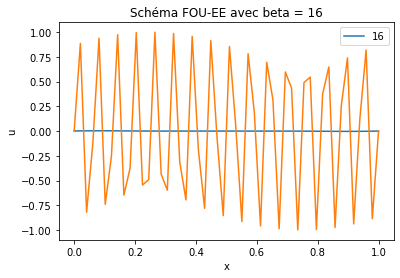

In [5]:
beta_list= [2,4,8,16]

for beta in beta_list:
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl1(x, L, beta)
    u = FOU_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = beta)
    plt.plot(x,u0)
    plt.title('Schéma FOU-EE avec beta = {}'.format(beta))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')


On remarque que, pour le schéma FOU,  plus le mode est grand, plus la solution numérique est atténuée. Un maillage plus fin permettrait une meilleur intégration numérique.

- Pour la condition initiale correspondant a β = 1, realiser des simulations avec les nombres C  egaux a 0.1, 0.2, 0.4, 0.8, 1, 1.5 et noter vos observations.

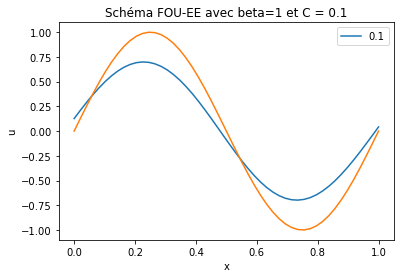

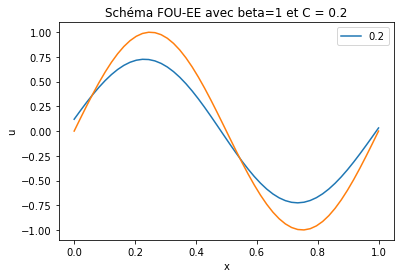

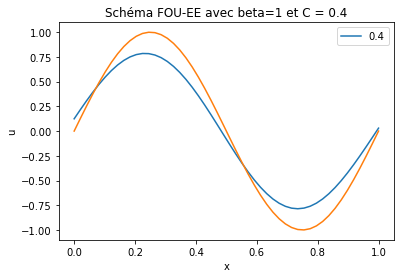

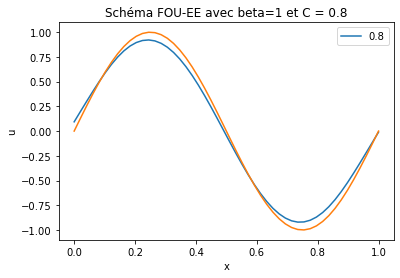

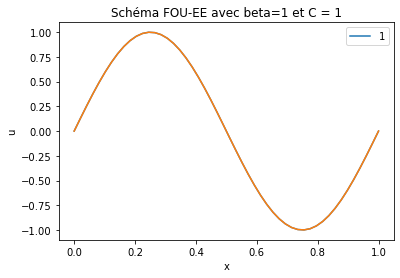

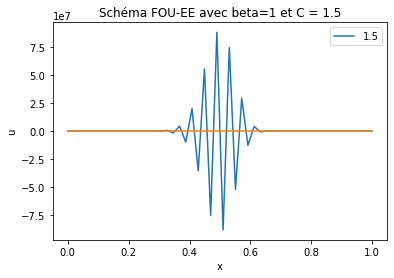

In [6]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl1(x, L, beta)
    u = FOU_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma FOU-EE avec beta=1 et C = {}'.format(C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

On remarque que, pour le schéma FOU, la condition de stabilité est CFL inférieur à 1. De plus, plus le CFL est proche de 1, plus la solution obtenue est bonne.

- Utiliser maintenant la condition initiale CI2. Sortir la solution a C = 1 aux instants suivants : T /4, T /2, 3T /4 et enfin T .

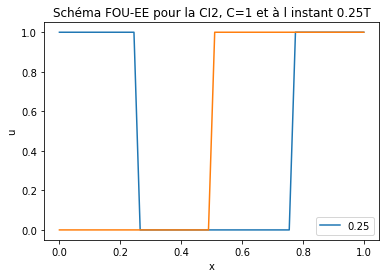

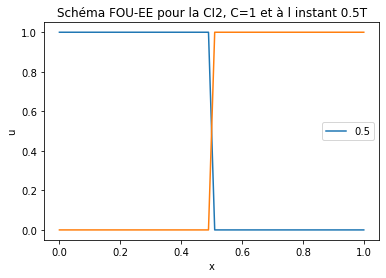

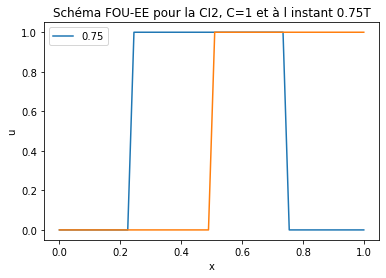

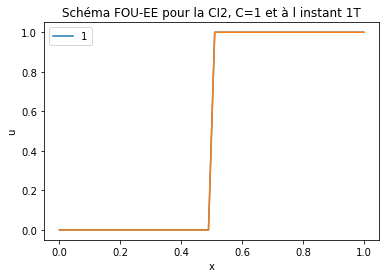

In [7]:
T_list = [1/4, 1/2, 3/4, 1]
C=1 # Nombre de Couran

for T in T_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = FOU_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = T)
    plt.plot(x,u0)
    plt.title('Schéma FOU-EE pour la CI2, C=1 et à l instant {}T'.format(T))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')


- Refaire l’etude sur l’influence du nombre C avec la condition initiale CI2.

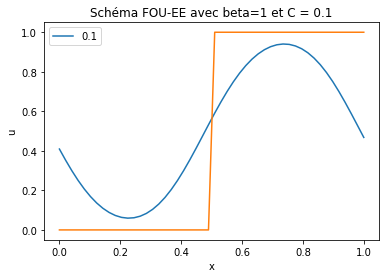

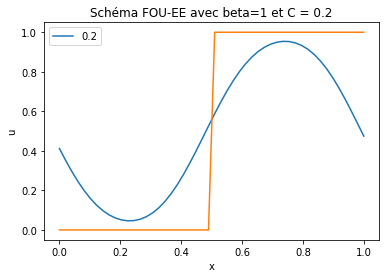

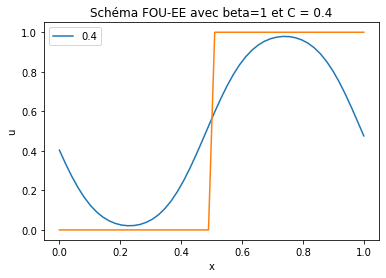

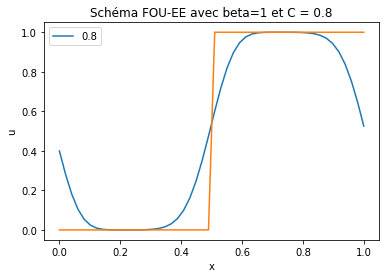

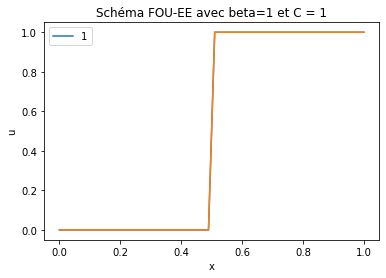

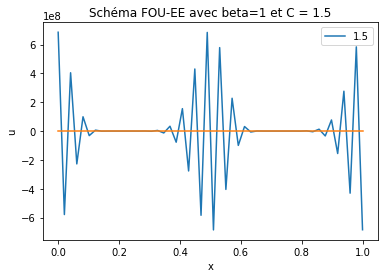

In [8]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = FOU_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma FOU-EE avec beta=1 et C = {}'.format(C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

- Toujours avec CI2 et C = 0.5, etudiez l’influence de la discretisation spatiale sur le resultat en prenant successivement un nombre de points m  egal a 4, 10, 20, 50, 100 et 200.

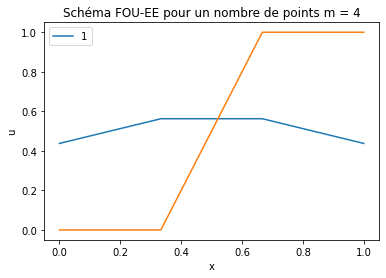

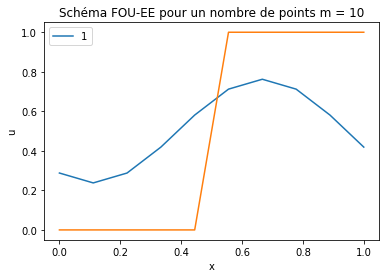

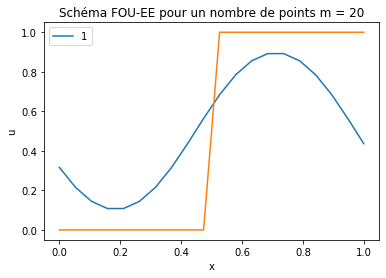

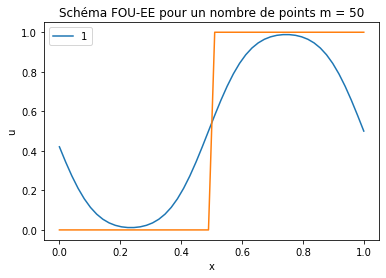

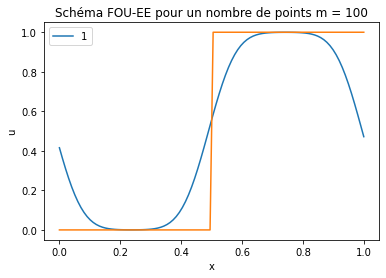

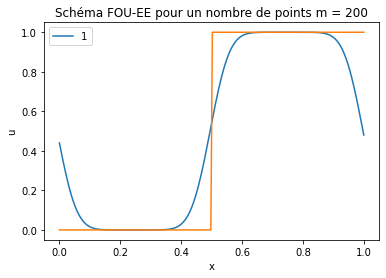

In [9]:
m_list = [4,10,20,50,100,200]
C=0.5 # Nombre de Couran

for m in m_list:
    dx = L/(m-1) # pas de la discrétisation en espace
    dt = dx*C/a # pas de la discrétisation en temps
    
    n=np.int0(np.ceil(T/dt))
    x=np.linspace(0,L,m)
    u0 = cond_init_cl2(x, x0)
    u = FOU_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = T)
    plt.plot(x,u0)
    plt.title('Schéma FOU-EE pour un nombre de points m = {}'.format(m))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

- Que se passe-t-il si l’on change le signe de a ?

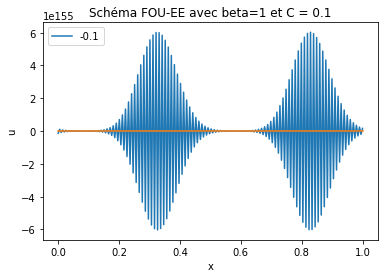

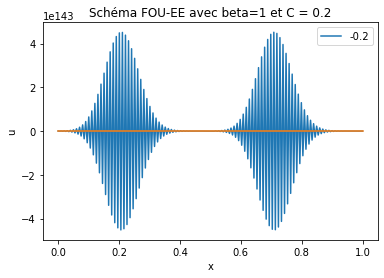

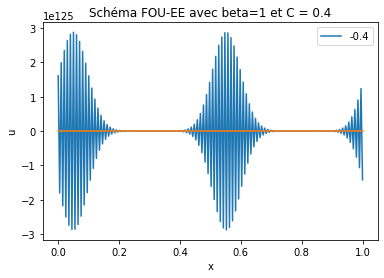

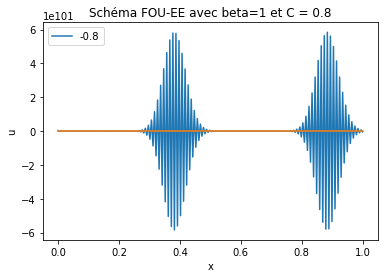

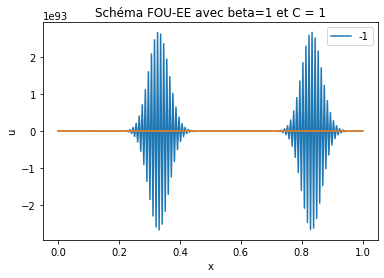

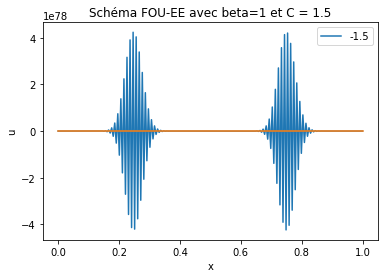

In [10]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    C=-C
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = FOU_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma FOU-EE avec beta=1 et C = {}'.format(-C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

Lorsqu'on change le signe de a, la propagation se fait dans le sens opposé et le schéma FOU devient inconditionellement instable.

**Schéma FOF-EE :**
$u_i^{n+1}=u_i^{n}-C(u_{i+1}^{n}-u_{i}^{n})$

In [11]:
def FOF_EE(u0, x, n, C):
    T = L/a # Temps de période de la fonction
    dt = dx*C/a # Pas de la discrétisation en temps
    un = np.copy(u0)
    u =np.zeros(len(u0))
    for j in range(n):
        u[0] = un[0]-C*(un[1]-un[0])
        for i in range(1,len(x)-1):
            u[i] = un[i]-C*(un[i+1]-un[i])
        un = np.copy(u)
    return un

In [12]:
L=1
m=50
x0=0.5

x=np.linspace(0,L,m)
a = 1 # Vitesse de convection
T = L/a # Temps de période de la fonction
C = 0.5 # Nombre de Couran
dx = L/(m-1) # Pas de la discrétisation en espace
dt = dx*C/a # Pas de la discrétisation en temps

- Visualiser les solutions obtenues en partant de la condition initiale CI1, en utilisant successivement des valeurs de β  egales a 2, 4, 8 et 16 et noter vos observations.

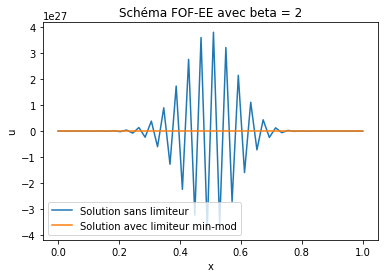

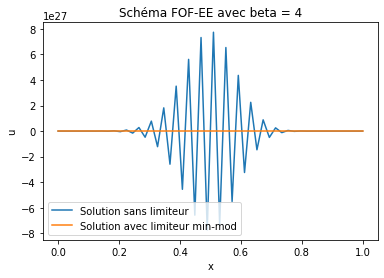

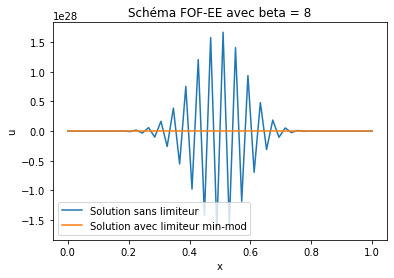

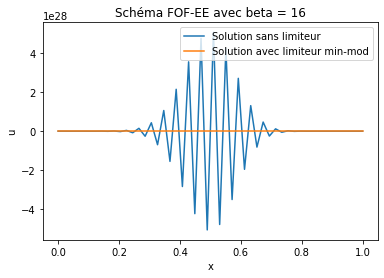

In [13]:
beta_list= [2,4,8,16]

for beta in beta_list:
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl1(x, L, beta)
    u = FOF_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = beta)
    plt.plot(x,u0)
    plt.title('Schéma FOF-EE avec beta = {}'.format(beta))
    plt.legend(["Solution sans limiteur","Solution avec limiteur min-mod"])
    plt.xlabel('x')
    plt.ylabel('u')

On remarque que, pour le schéma FOF,  peu importe le mode, le schéma n'est pas correcte.

- Pour la condition initiale correspondant a β = 1, realiser des simulations avec les nombres C  egaux a 0.1, 0.2, 0.4, 0.8, 1, 1.5 et noter vos observations.

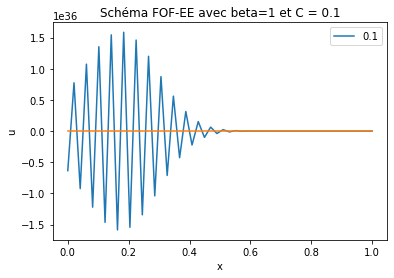

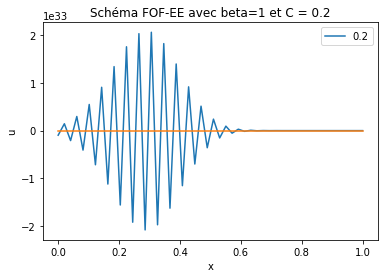

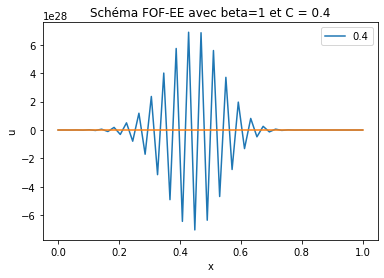

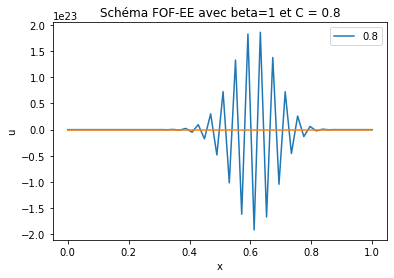

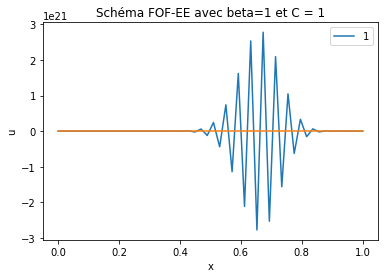

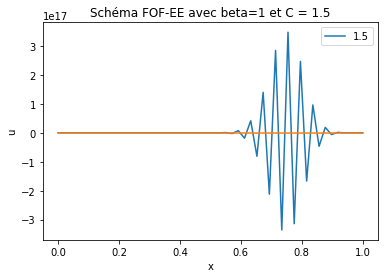

In [14]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl1(x, L, beta)
    u = FOF_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma FOF-EE avec beta=1 et C = {}'.format(C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

On remarque que, pour le schéma FOF, le schéma est inconditionellement instable.

- Utiliser maintenant la condition initiale CI2. Sortir la solution a C = 1 aux instants suivants : T /4, T /2, 3T /4 et enfin T.

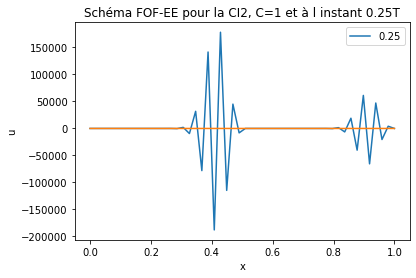

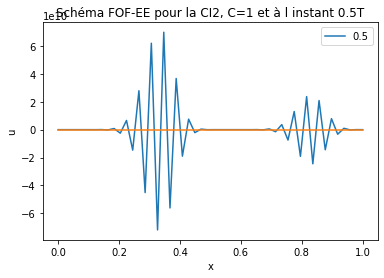

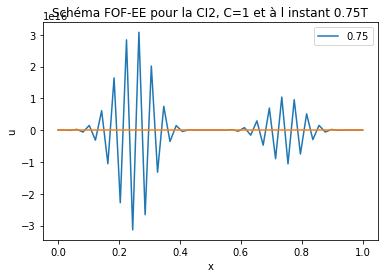

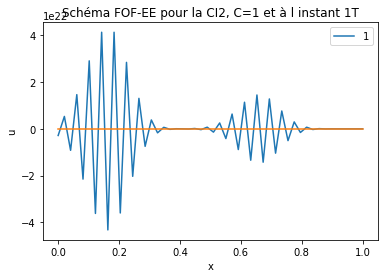

In [15]:
T_list = [1/4, 1/2, 3/4, 1]
C=1 # Nombre de Couran

for T in T_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = FOF_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = T)
    plt.plot(x,u0)
    plt.title('Schéma FOF-EE pour la CI2, C=1 et à l instant {}T'.format(T))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

- Refaire l’etude sur l’influence du nombre C avec la condition initiale CI2.

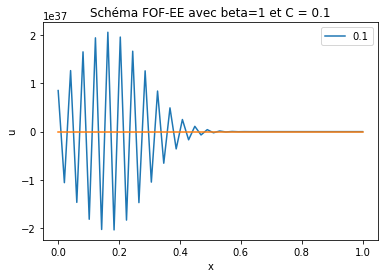

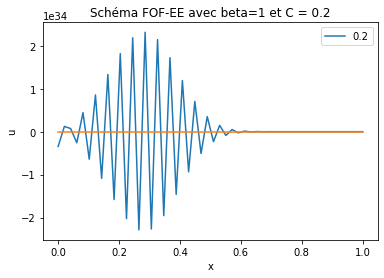

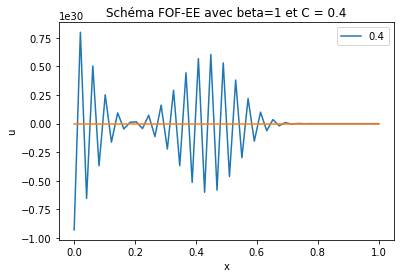

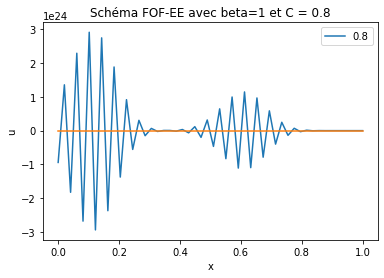

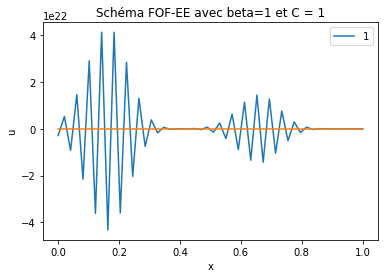

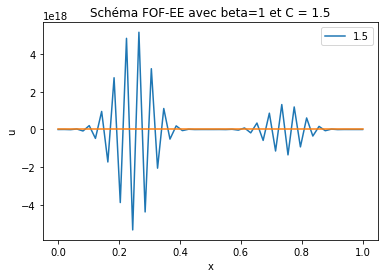

In [16]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = FOF_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma FOF-EE avec beta=1 et C = {}'.format(C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

- Toujours avec CI2 et C = 0.5, etudiez l’influence de la discretisation spatiale sur le resultat en prenant successivement un nombre de points m  egal a 4, 10, 20, 50, 100 et 200.

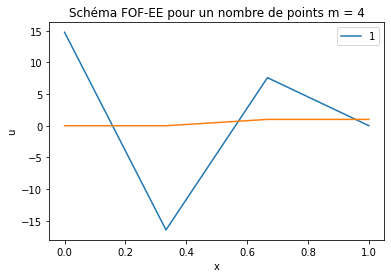

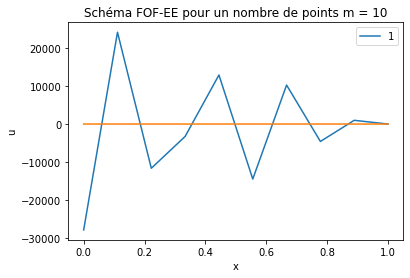

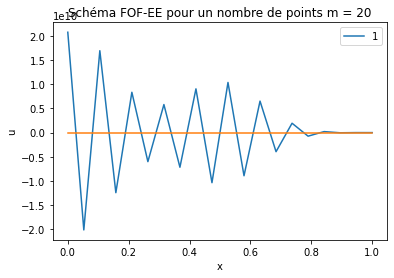

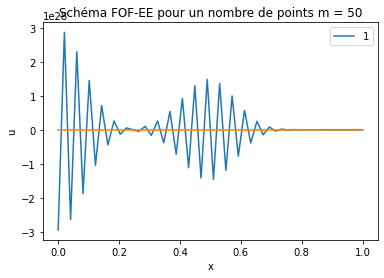

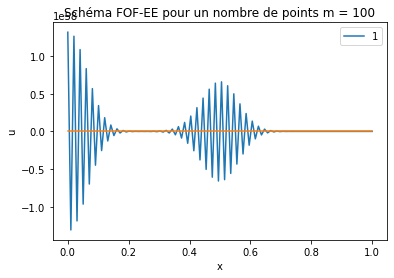

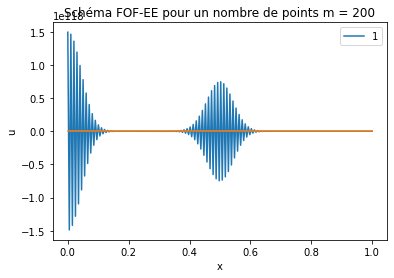

In [17]:
m_list = [4,10,20,50,100,200]
C=0.5 # Nombre de Couran

for m in m_list:
    dx = L/(m-1) # pas de la discrétisation en espace
    dt = dx*C/a # pas de la discrétisation en temps
    
    n=np.int0(np.ceil(T/dt))
    x=np.linspace(0,L,m)
    u0 = cond_init_cl2(x, x0)
    u = FOF_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = T)
    plt.plot(x,u0)
    plt.title('Schéma FOF-EE pour un nombre de points m = {}'.format(m))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

- Que se passe-t-il si l’on change le signe de a ?

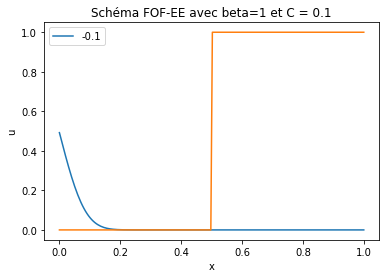

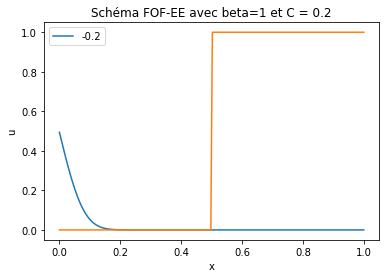

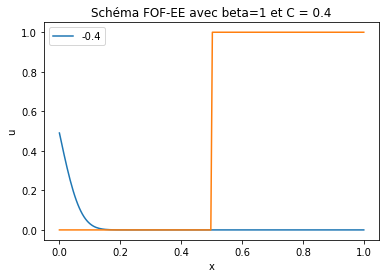

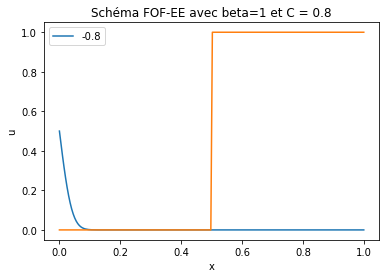

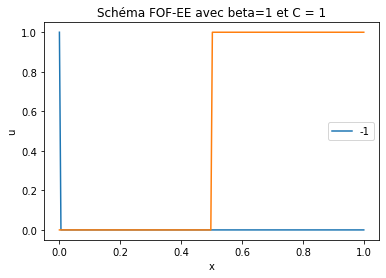

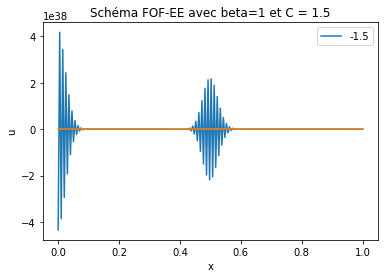

In [18]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    C=-C
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = FOF_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma FOF-EE avec beta=1 et C = {}'.format(-C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

Lorsqu'on change le signe de a, la propagation se fait dans le sens opposé et le schéma FOF est stable pour un CFL inférieur à 1.

**Schéma SOC-EE :** 
$u_i^{n+1}=u_i^{n}-\frac{C}{2}(u_{i+1}^{n}-u_{i-1}^{n})$

In [19]:
def SOC_EE(u0, x, n, C):
    T = L/a # Temps de période de la fonction
    dt = dx*C/a # Pas de la discrétisation en temps
    un = np.copy(u0)
    u =np.zeros(len(u0))
    for j in range(n):
        u[0] = un[0]-C*(un[1]-un[-1])/2
        for i in range(1,len(x)-1):
            u[i] = un[i]-C*(un[i+1]-un[i-1])/2
        un = np.copy(u)
    return un

In [20]:
L=1
m=50
x0=0.5

x=np.linspace(0,L,m)
a = 1 # Vitesse de convection
T = L/a # Temps de période de la fonction
C = 0.5 # Nombre de Couran
dx = L/(m-1) # Pas de la discrétisation en espace
dt = dx*C/a # Pas de la discrétisation en temps

- Visualiser les solutions obtenues en partant de la condition initiale CI1, en utilisant successivement des valeurs de β  egales a 2, 4, 8 et 16 et noter vos observations.

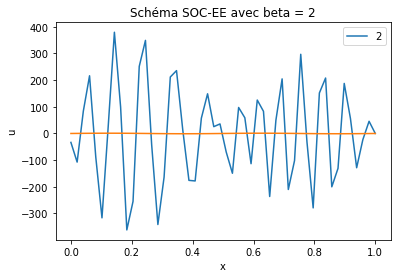

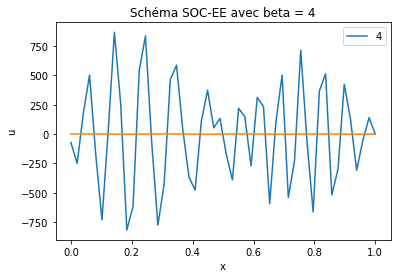

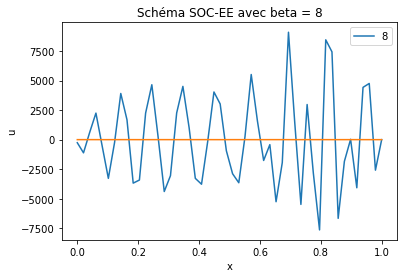

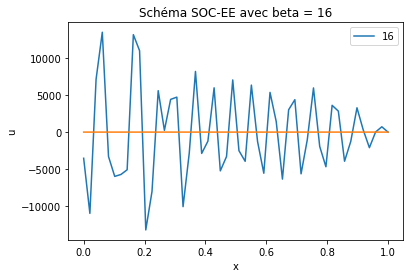

In [21]:
beta_list= [2,4,8,16]

for beta in beta_list:
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl1(x, L, beta)
    u = SOC_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = beta)
    plt.plot(x,u0)
    plt.title('Schéma SOC-EE avec beta = {}'.format(beta))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

On remarque que, pour le schéma SOC, la solution obtenue a l'air bruitée proportionellement au mode choisi.

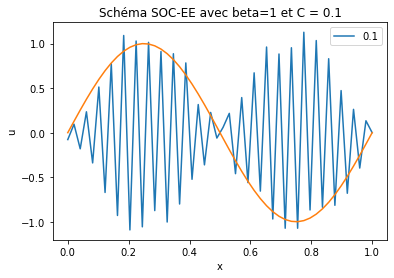

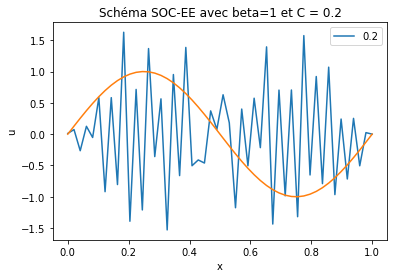

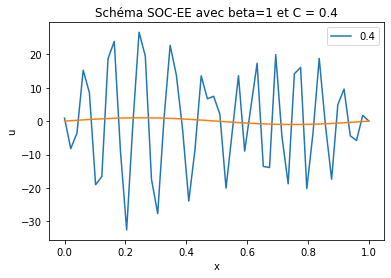

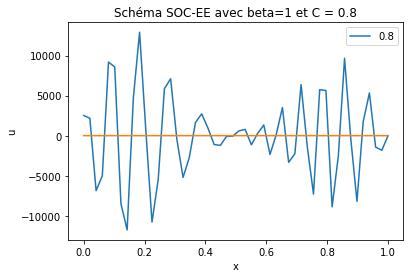

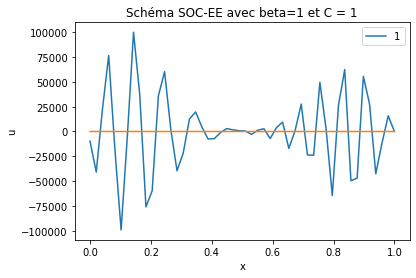

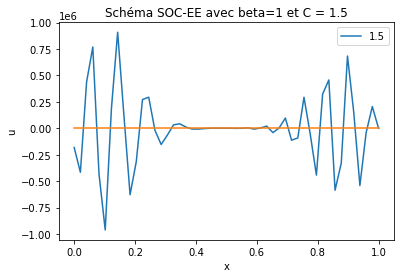

In [22]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl1(x, L, beta)
    u = SOC_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma SOC-EE avec beta=1 et C = {}'.format(C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

On remarque que le schéma SOC est inconditionellement instable.

- Utiliser maintenant la condition initiale CI2. Sortir la solution a C = 1 aux instants suivants : T /4, T /2, 3T /4 et enfin T.

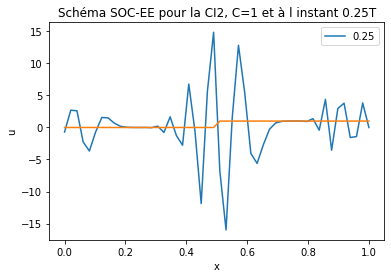

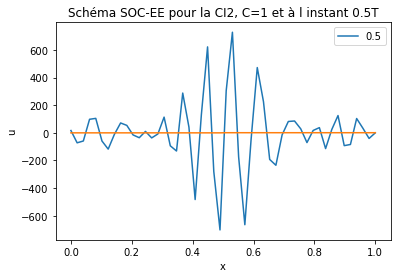

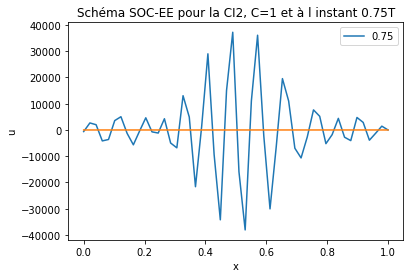

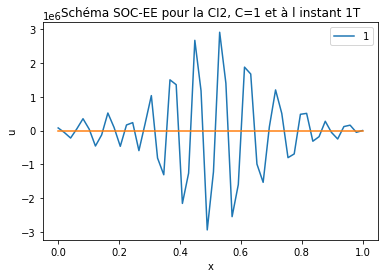

In [23]:
T_list = [1/4, 1/2, 3/4, 1]
C=1 # Nombre de Couran

for T in T_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = SOC_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = T)
    plt.plot(x,u0)
    plt.title('Schéma SOC-EE pour la CI2, C=1 et à l instant {}T'.format(T))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')


- Refaire l’etude sur l’influence du nombre C avec la condition initiale CI2.

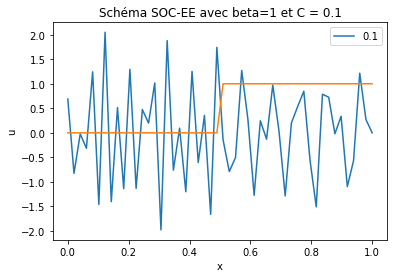

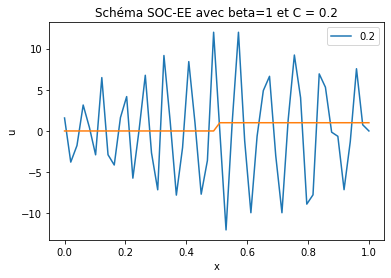

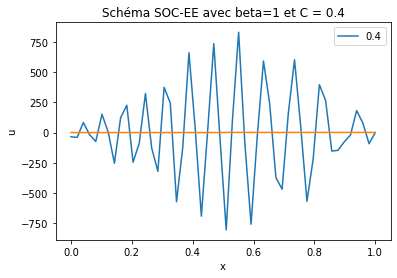

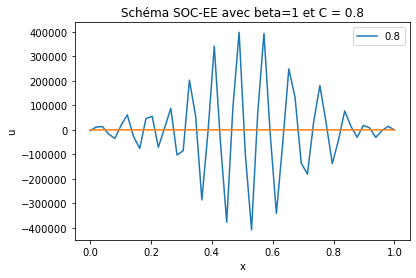

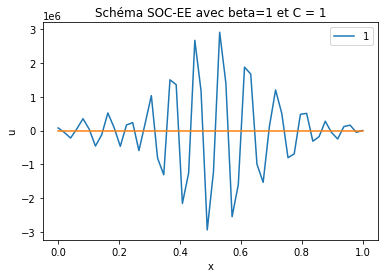

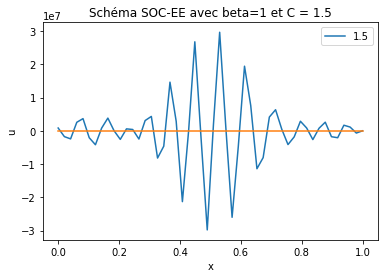

In [24]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = SOC_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma SOC-EE avec beta=1 et C = {}'.format(C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

- Toujours avec CI2 et C = 0.5, etudiez l’influence de la discretisation spatiale sur le resultat en prenant successivement un nombre de points m  egal a 4, 10, 20, 50, 100 et 200.

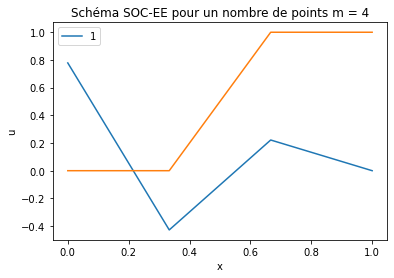

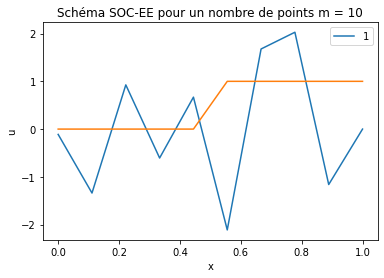

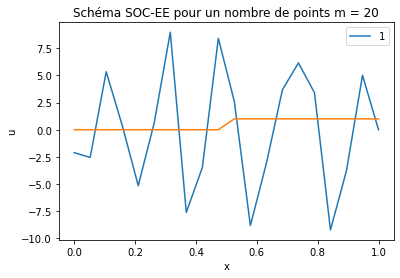

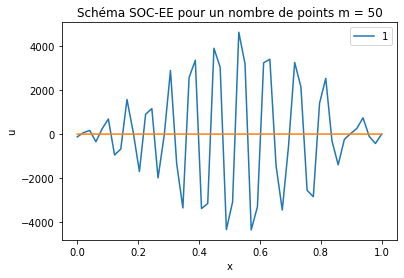

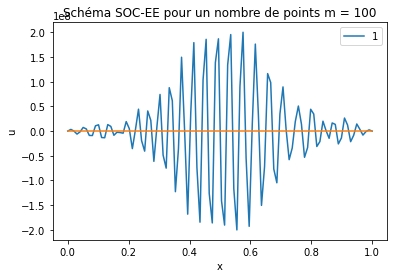

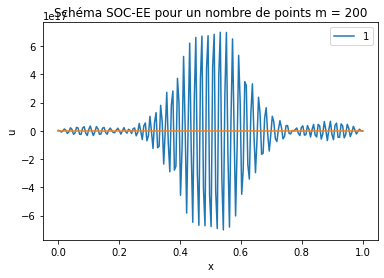

In [25]:
m_list = [4,10,20,50,100,200]
C=0.5 # Nombre de Couran

for m in m_list:
    dx = L/(m-1) # pas de la discrétisation en espace
    dt = dx*C/a # pas de la discrétisation en temps
    
    n=np.int0(np.ceil(T/dt))
    x=np.linspace(0,L,m)
    u0 = cond_init_cl2(x, x0)
    u = SOC_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = T)
    plt.plot(x,u0)
    plt.title('Schéma SOC-EE pour un nombre de points m = {}'.format(m))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

- Que se passe-t-il si l’on change le signe de a ?

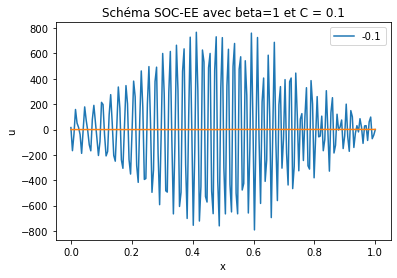

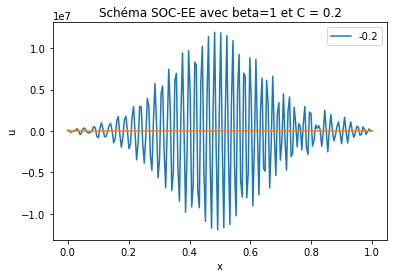

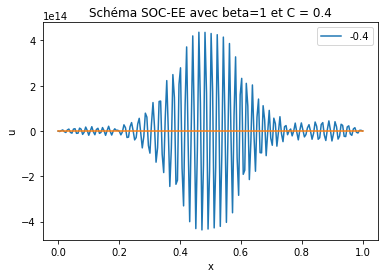

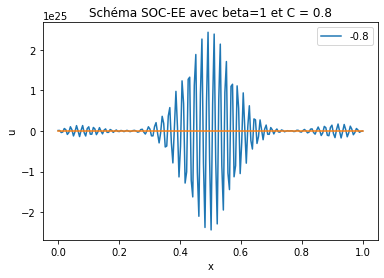

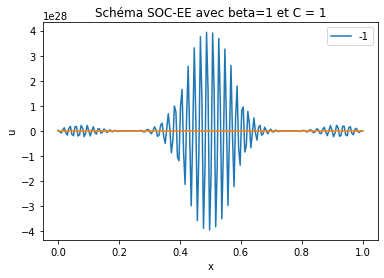

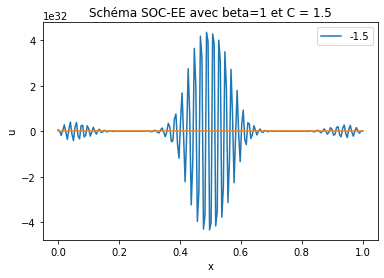

In [26]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    C=-C
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = SOC_EE(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma SOC-EE avec beta=1 et C = {}'.format(-C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

Lorsqu'on change le signe de a, la propagation se fait dans le sens opposé et le schéma SOC devient inconditionellement instable.

**Schéma de Lax-Wendroff :** 
$u_i^{n+1}=u_i^{n}-\frac{C}{2}(u_{i+1}^{n}-u_{i-1}^{n})+\frac{C^2}{2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$

In [27]:
def Lax_Wendroff(u0, x, n, C):
    T = L/a # Temps de période de la fonction
    dt = dx*C/a # Pas de la discrétisation en temps
    un = np.copy(u0)
    u =np.zeros(len(u0))
    for j in range(n):
        u[0] = un[0]-C*(un[0]-un[-1])
        for i in range(1,len(x)):
            u[i] = un[i]-C*(un[i]-un[i-1])
        un = np.copy(u)
    return un

In [28]:
L=1
m=50
x0=0.5

x=np.linspace(0,L,m)
a = 1 # Vitesse de convection
T = L/a # Temps de période de la fonction
C = 0.5 # Nombre de Couran
dx = L/(m-1) # Pas de la discrétisation en espace
dt = dx*C/a # Pas de la discrétisation en temps

- Visualiser les solutions obtenues en partant de la condition initiale CI1, en utilisant successivement des valeurs de β  egales a 2, 4, 8 et 16 et noter vos observations.

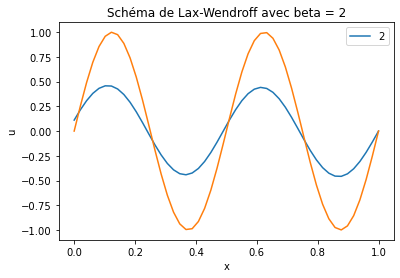

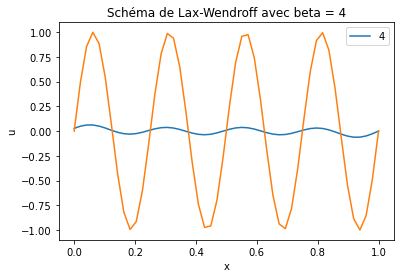

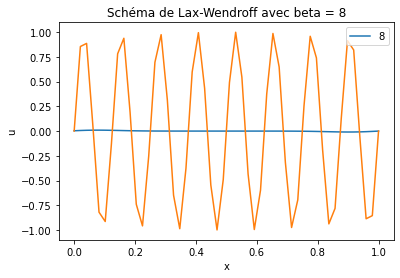

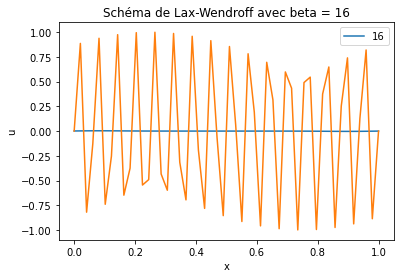

In [29]:
beta_list= [2,4,8,16]

for beta in beta_list:
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl1(x, L, beta)
    u = Lax_Wendroff(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = beta)
    plt.plot(x,u0)
    plt.title('Schéma de Lax-Wendroff avec beta = {}'.format(beta))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

On remarque que, pour le schéma de Lax-Wendroff, on a une bonne intégration pour beta = 2 et 4 même si le schéma n'est pas monotone mais on retrouve le même problème que pour le schéma FOU pour des modes plus grands.

- Pour la condition initiale correspondant a β = 1, realiser des simulations avec les nombres C  egaux a 0.1, 0.2, 0.4, 0.8, 1, 1.5 et noter vos observations.

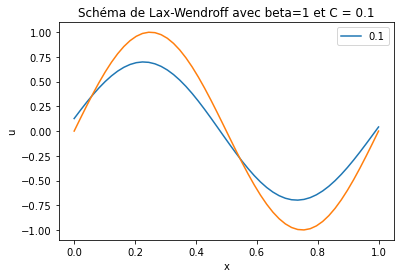

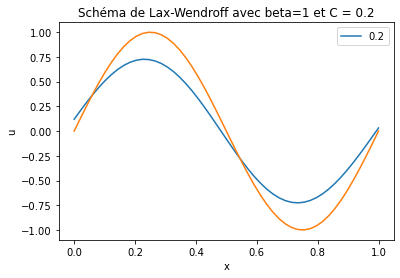

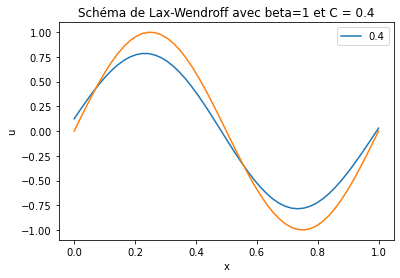

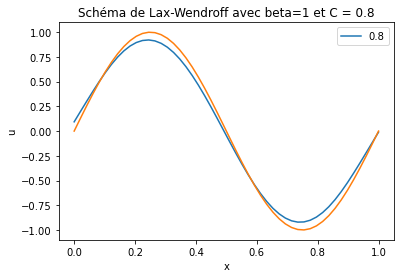

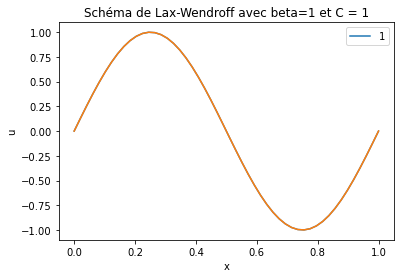

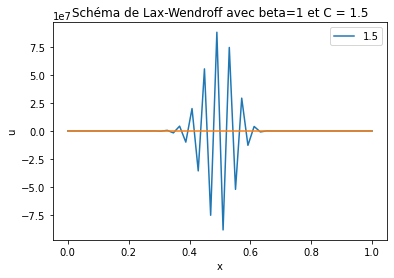

In [30]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl1(x, L, beta)
    u = Lax_Wendroff(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma de Lax-Wendroff avec beta=1 et C = {}'.format(C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

On remarque que, pour le schéma de Lax-Wendroff, la condition de stabilité est CFL inférieur à 1. De plus, plus le CFL est proche de 1, plus la solution obtenue est bonne.

- Utiliser maintenant la condition initiale CI2. Sortir la solution a C = 1 aux instants suivants : T /4, T /2, 3T /4 et enfin T.

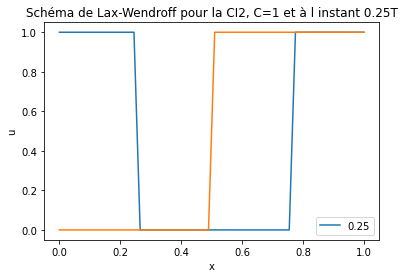

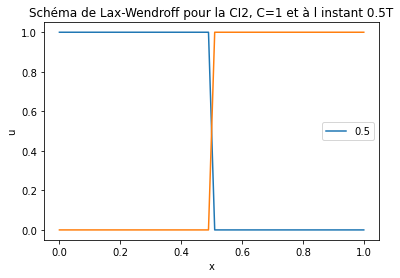

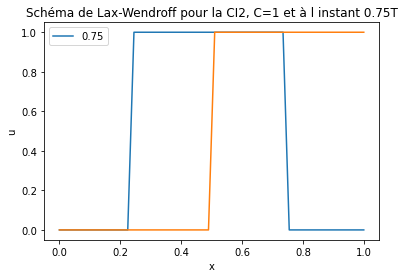

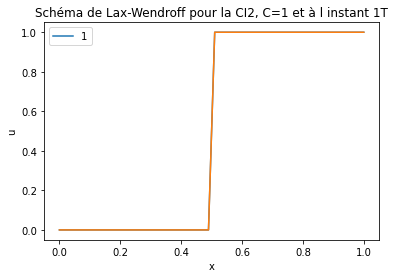

In [31]:
T_list = [1/4, 1/2, 3/4, 1]
C=1 # Nombre de Couran

for T in T_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = Lax_Wendroff(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = T)
    plt.plot(x,u0)
    plt.title('Schéma de Lax-Wendroff pour la CI2, C=1 et à l instant {}T'.format(T))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')


- Refaire l’etude sur l’influence du nombre C avec la condition initiale CI2.

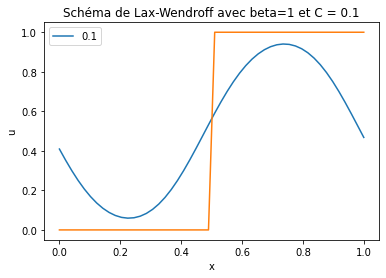

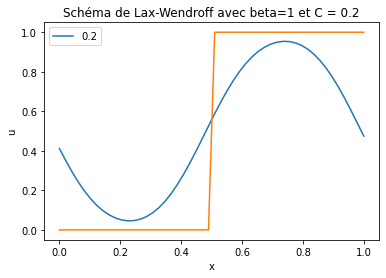

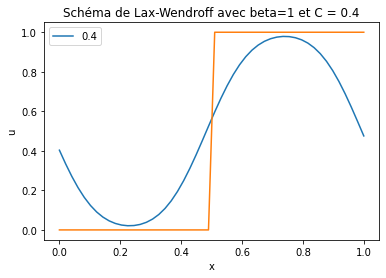

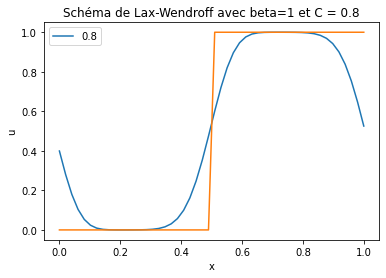

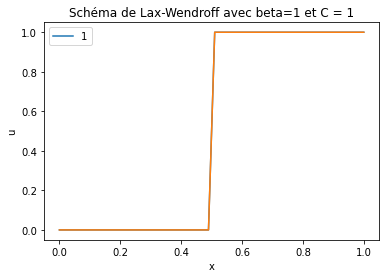

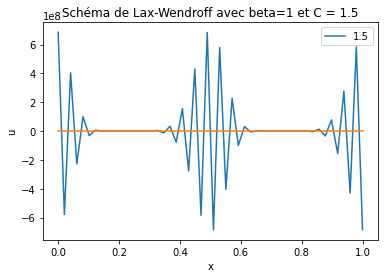

In [32]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1

for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = Lax_Wendroff(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma de Lax-Wendroff avec beta=1 et C = {}'.format(C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

- Toujours avec CI2 et C = 0.5, etudiez l’influence de la discretisation spatiale sur le resultat en prenant successivement un nombre de points m  egal a 4, 10, 20, 50, 100 et 200.

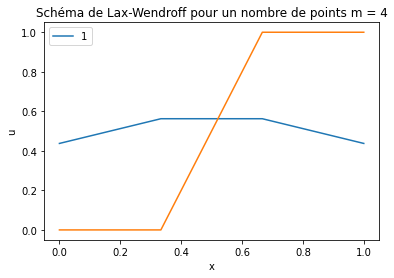

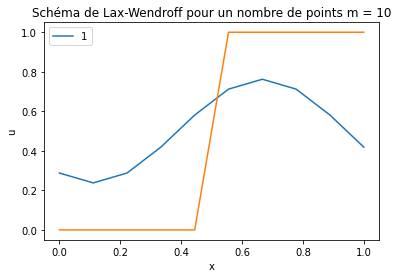

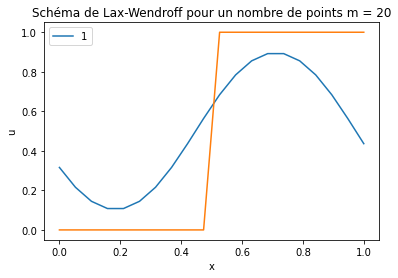

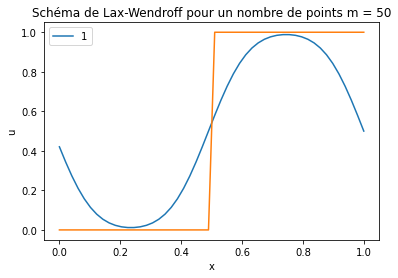

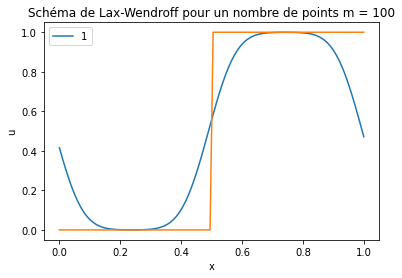

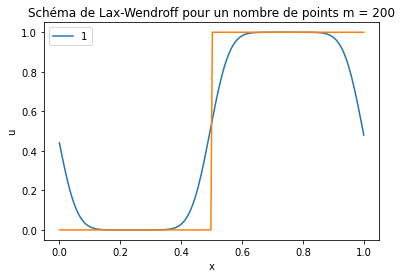

In [33]:
m_list = [4,10,20,50,100,200]
C=0.5 # Nombre de Couran

for m in m_list:
    dx = L/(m-1) # pas de la discrétisation en espace
    dt = dx*C/a # pas de la discrétisation en temps
    
    n=np.int0(np.ceil(T/dt))
    x=np.linspace(0,L,m)
    u0 = cond_init_cl2(x, x0)
    u = Lax_Wendroff(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = T)
    plt.plot(x,u0)
    plt.title('Schéma de Lax-Wendroff pour un nombre de points m = {}'.format(m))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

- Que se passe-t-il si l’on change le signe de a ?

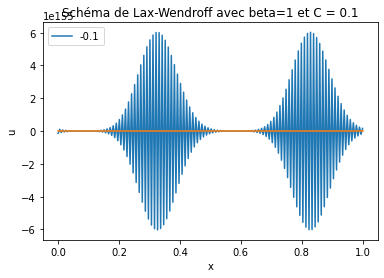

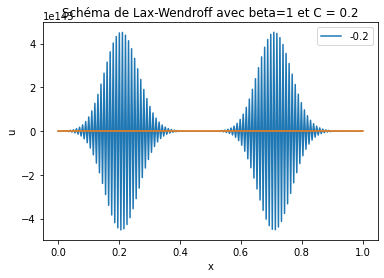

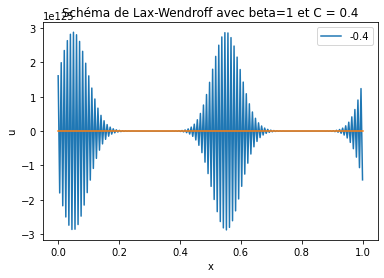

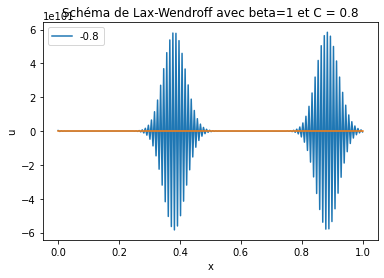

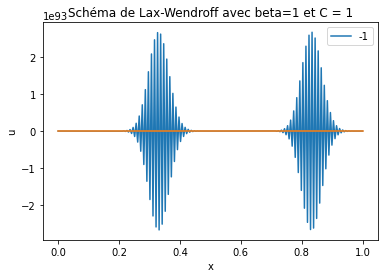

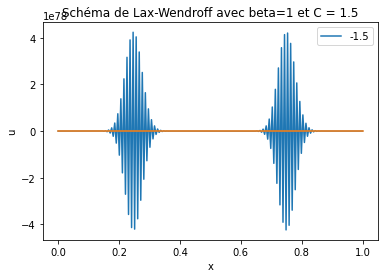

In [34]:
C_list = [0.1, 0.2, 0.4, 0.8, 1,1.5]
beta = 1
for C in C_list:
    dt = dx*C/a # pas de la discrétisation en temps
    C=-C
    n=np.int0(np.ceil(T/dt))
    u0 = cond_init_cl2(x, x0)
    u = Lax_Wendroff(u0, x, n, C)
    
    # Affichage
    plt.figure()
    plt.plot(x, u, label = C)
    plt.plot(x,u0)
    plt.title('Schéma de Lax-Wendroff avec beta=1 et C = {}'.format(-C))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('u')

Lorsqu'on change le signe de a, la propagation se fait dans le sens opposé et le schéma de Lax-Wendroff est inconditionellement instable.